#Coding Assignment:
##Name: Rishit Chaudhary

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# We need TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
# 1. numpy
# 2. matplotlib
import numpy as np
import matplotlib.pyplot as plt

print("The version of Tensorflow I am using for my Project is:", tf.__version__)

The version of Tensorflow I am using for my Project is: 1.14.0


### I am using the Fashion MNIST Database, for my Project

In [0]:
# I am using the Fashion MNIST Database, for my Project
fashion_mnist_dataset = keras.datasets.fashion_mnist

# Now I am going to load the data in the Fashion MNIST Database
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist_dataset.load_data()

The images used are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These integers correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. The labels are included, but the *class names* are not included with the dataset, so I am storing them here to use later when I will be plotting the images

In [0]:
# I have now made a list of the class names in order
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Now I will try to find the number of images in the traning dataset and the height and width of each image in Pixels

In [4]:
# Now I will try to find the number of images in the traning dataset and the height and width of each image in Pixels
print(train_imgs.shape)
print("The number of images are:", train_imgs.shape[0])
print("The dimensions of each of the images are:", train_imgs.shape[1], 'x', train_imgs.shape[2])

(60000, 28, 28)
The number of images are: 60000
The dimensions of each of the images are: 28 x 28


In [5]:
# This is the number of labels in the train_labels variable, the number of labels here has to be equal the number of images in the train_imgs variable as the the train_lables are for the train_imgs only
len(train_labels)

60000

In [6]:
# This variable contains an array of the labels, where each label is an integer between 0 and 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
# Now I will try to find the number of images in the test_imgs variable and the height and width of each image in Pixels
test_imgs.shape

(10000, 28, 28)

In [8]:
# This is the number of labels in the test_labels variable, the number of labels here has to be equal the number of images in the test_imgs variable as the the test_lables are for the test_imgs only
len(test_labels)

10000

## Now I will display the 10th image in the train_imgs variable, along with its corresponding label



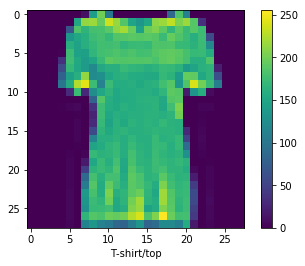

In [9]:
# Now I will display the 10th image in the train_imgs variable, along with its corresponding label
plt.figure()
plt.imshow(train_imgs[10])
plt.xlabel(class_names[train_labels[10]])
plt.colorbar()
plt.grid(False)
plt.show()

I am now scaling the values to a range of 0 to 1 before feeding them to the neural network model. 
To do this, I have divided the values by 255, for both the training set and the testing set as they both need to be preprocessed in the same way

In [0]:
train_imgs = train_imgs / 255.0

test_imgs = test_imgs / 255.0

##Now I am going to display the first 25 images from the training data set along with their respective class name below each image

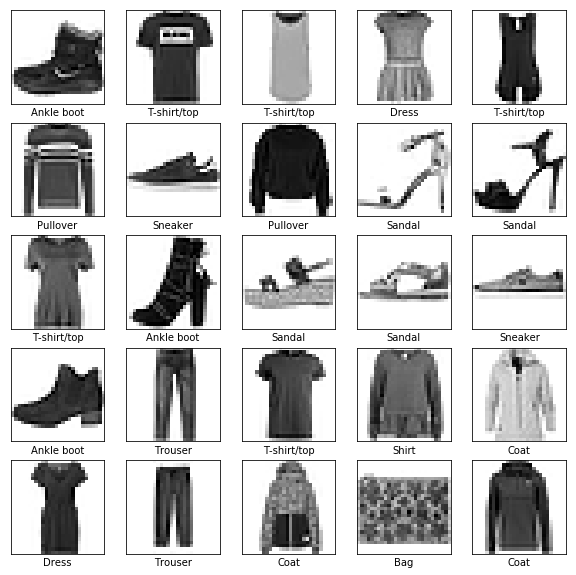

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imgs[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Building the Model:
For the first layer in my network, tf.keras.layers.Flatten, transforms the format of each of the images from a 2d-array (of 28 x 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. 

After the pixels have been flattened, my network consists of a sequence of two tf.keras.layers.Dense layers. The first Dense layer has 128 nodes. The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. 

Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes, of the data set.

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

W0704 16:52:30.342221 139962665637760 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model.fit(train_imgs, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4962 - acc: 0.8255
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3754 - acc: 0.8640
Epoch 3/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3366 - acc: 0.8781
Epoch 4/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3121 - acc: 0.8866
Epoch 5/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2950 - acc: 0.8911


## Now, I am going to compare how the model performs on the test dataset

In [14]:
test_set_loss, test_set_acc = model.evaluate(test_imgs, test_labels)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.3625 - acc: 0.8706


In [15]:
print('Test accuracy:', test_set_acc)
print('Test loss:', test_set_loss)

Test accuracy: 0.8706
Test loss: 0.36253971610069274


## Making predictions on Test Data set


In [0]:
predictions = model.predict(test_imgs)

In [17]:
predictions

array([[1.58958198e-06, 2.50566529e-07, 7.65143795e-06, ...,
        1.07442603e-01, 5.33076854e-05, 6.63931251e-01],
       [8.45465638e-06, 2.05319811e-12, 9.99205410e-01, ...,
        2.00007580e-10, 1.08290710e-08, 1.78309245e-14],
       [2.66316258e-09, 1.00000000e+00, 2.91659717e-11, ...,
        5.45413945e-19, 1.40140191e-11, 3.26543973e-17],
       ...,
       [5.38805546e-03, 9.73187486e-09, 4.43551398e-04, ...,
        2.26233084e-07, 9.89709318e-01, 3.45622819e-09],
       [1.13387564e-07, 9.99727666e-01, 2.50554510e-09, ...,
        2.39338551e-13, 1.72773653e-08, 5.40778490e-12],
       [6.24599488e-05, 2.41066846e-06, 1.00776269e-04, ...,
        4.13531531e-03, 2.77821062e-04, 2.20056299e-05]], dtype=float32)

##Below is the prediction that my Model has made for the 10<sup>th</sup>  test image

In [18]:
predictions[10]

array([6.1343453e-05, 9.5682162e-06, 4.0421331e-01, 3.5560658e-06,
       5.0842470e-01, 2.5621589e-06, 8.7254614e-02, 6.7243093e-08,
       3.0343474e-05, 4.6634754e-09], dtype=float32)

In [19]:
#The label which has the highest confidence value, form the above prediction is got from the code below
np.argmax(predictions[10])

4

In [20]:
#The model is most confident that this image is a coat, or class_names[4], but we need to check the test label to see if this is correct
test_labels[10]

4

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  #The label which has the highest confidence value, form the above prediction is got from the code below
  predicted_label = np.argmax(predictions_array)
  
  #Now we are checking to see if the model got the prediction right
  #Correct prediction labels are blue and incorrect prediction labels are red. 
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  #The number gives the percent (out of 100) for the predicted label.
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## The 0th image, along with its predictions, and prediction array

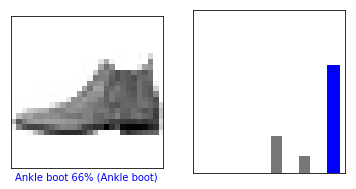

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_imgs)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

# The 12th image, along with its predictions, and prediction array

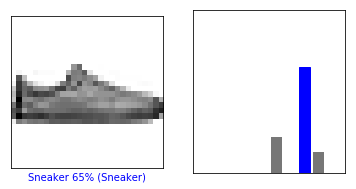

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_imgs)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

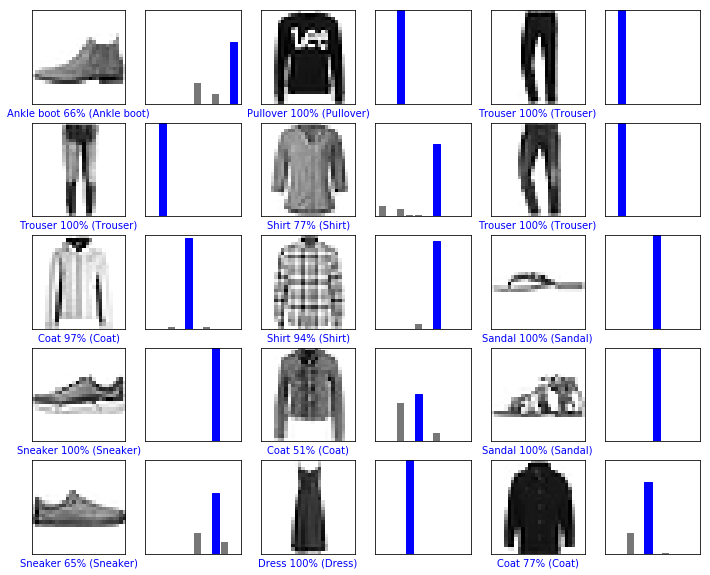

In [24]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [25]:
# Grab an image from the test dataset
img = test_imgs[0]

# Print its Dimensions in Pixels
print(img.shape)

(28, 28)


In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

# The image is the only one in the batch, its Dimensions in Pixels are 28 x 28
print(img.shape)

(1, 28, 28)


In [27]:
print(img)

[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
  

In [28]:
#Now predict what the image is
predictions_single = model.predict(img)

print(predictions_single)

[[1.5895858e-06 2.5056693e-07 7.6514571e-06 7.4445602e-08 5.3840113e-06
  2.2853428e-01 2.3758001e-05 1.0744257e-01 5.3307660e-05 6.6393101e-01]]


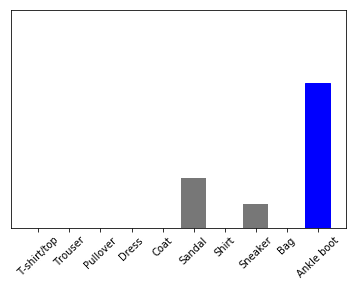

In [29]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=44)
plt.show()

In [30]:
prediction_result = np.argmax(predictions_single[0])
print("Our prediction result is:", prediction_result, "which means that, my model has identified the image to be:", class_names[prediction_result])

Our prediction result is: 9 which means that, my model has identified the image to be: Ankle boot


##Let's see what the Image actually is,

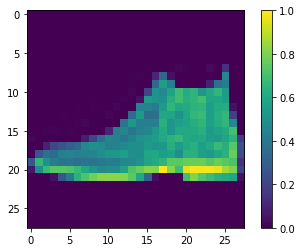

In [31]:
plt.figure()
plt.imshow(test_imgs[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [32]:
if(prediction_result == test_labels[0]):
  print("The prediction made was Correct !")
else:
  print("The prediction made was Incorrect !")

The prediction made was Correct !


## The model successfully predicted the right answer in this case.